In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("cars-dataset.csv")

In [3]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [5]:
#By closely observing the data, I can see that there are ? marks in the "hp" column
df =df.replace('?', np.nan)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [8]:
df["hp"]=df["hp"].fillna(df["hp"].median())

In [9]:
df["hp"]=df["hp"].astype('float64')

In [10]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [11]:
import seaborn as sns

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


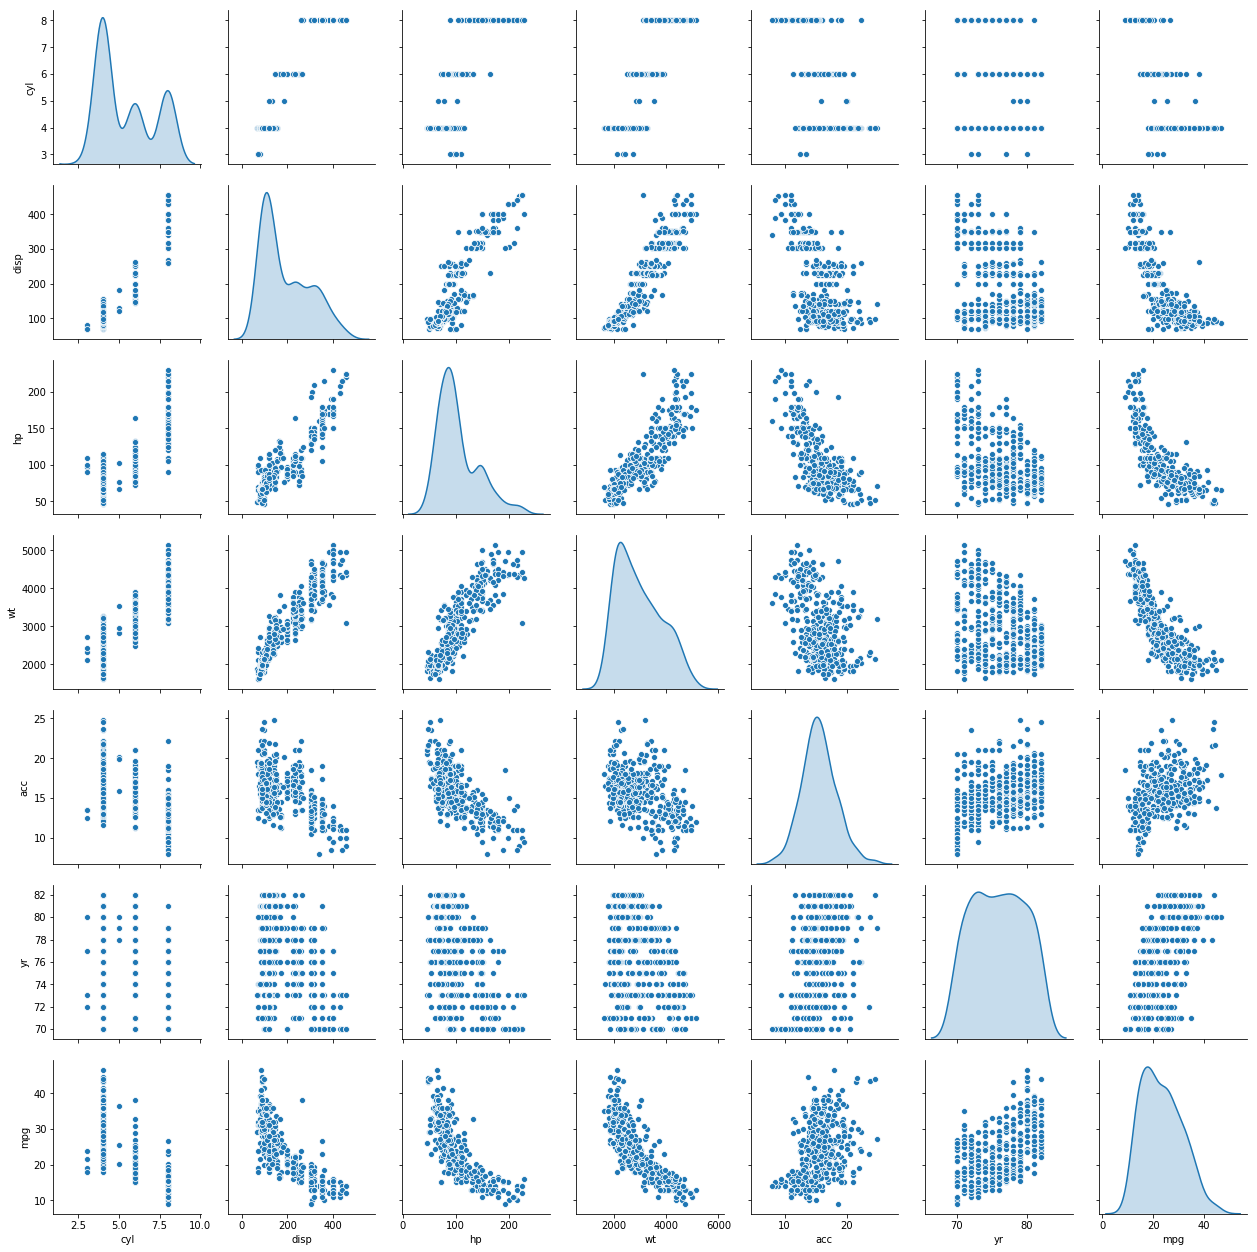

In [12]:
sns.pairplot(df,diag_kind='kde')

In [13]:
#I can see three Gaussians in the cylinder column which gives me an idea that the data might be coming 
#from 3 different sources or there are 3 types of data in the dataframe

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

In [15]:
from scipy.stats import zscore

In [16]:
df_dropped=df.drop(labels="car name",axis=1)

In [17]:
df_z=df_dropped.apply(zscore)

In [18]:
df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [19]:
cluster_range=range(2,10)
cluster_errors=[]
cluster_sil_scores=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=5)
    clusters.fit(df_z)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    cluster_sil_scores.append(metrics.silhouette_score(df_z,labels,metric='euclidean'))
    

In [20]:

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1294.841895,0.482359
1,3,946.463973,0.342712
2,4,738.374388,0.348179
3,5,664.889003,0.311846
4,6,598.740257,0.282720
5,7,541.952570,0.285546
6,8,499.986122,0.267537
7,9,468.257864,0.250202


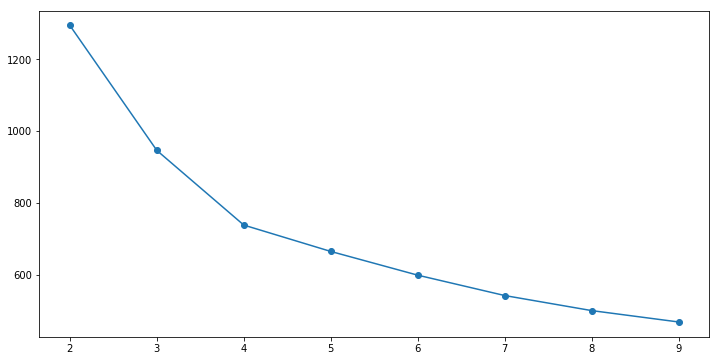

In [21]:
#Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [22]:
#The elbow plot shows  that the appropriate number of clusters could be K=3, at that point, the plot takes a sharp bend

In [48]:
cluster = KMeans( n_clusters = 3)
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-8.42372041e-01, -7.96665826e-01, -6.55587340e-01,
        -7.73833757e-01,  3.38012540e-01,  3.03996132e-01,
         7.42350465e-01,  2.46919431e+00],
       [ 1.49819126e+00,  1.50068407e+00,  1.51412926e+00,
         1.40001604e+00, -1.07612225e+00, -6.72555902e-01,
        -1.15871315e+00,  1.00000000e+00],
       [ 3.84916643e-01,  2.77516331e-01, -5.99277314e-02,
         3.29102162e-01,  3.35988784e-01, -2.72144865e-03,
        -5.06067376e-01,  6.66133815e-16]])

In [50]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,-0.842372,-0.796666,-0.655587,-0.773834,0.338013,0.303996,0.742350,2.469194e+00
1,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556,-1.158713,1.000000e+00
2,0.384917,0.277516,-0.059928,0.329102,0.335989,-0.002721,-0.506067,6.661338e-16


In [51]:
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction


In [52]:
# Counting the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,211,211,211,211,211,211,211
1,95,95,95,95,95,95,95
2,92,92,92,92,92,92,92


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A672B7160>,
      dtype=object)

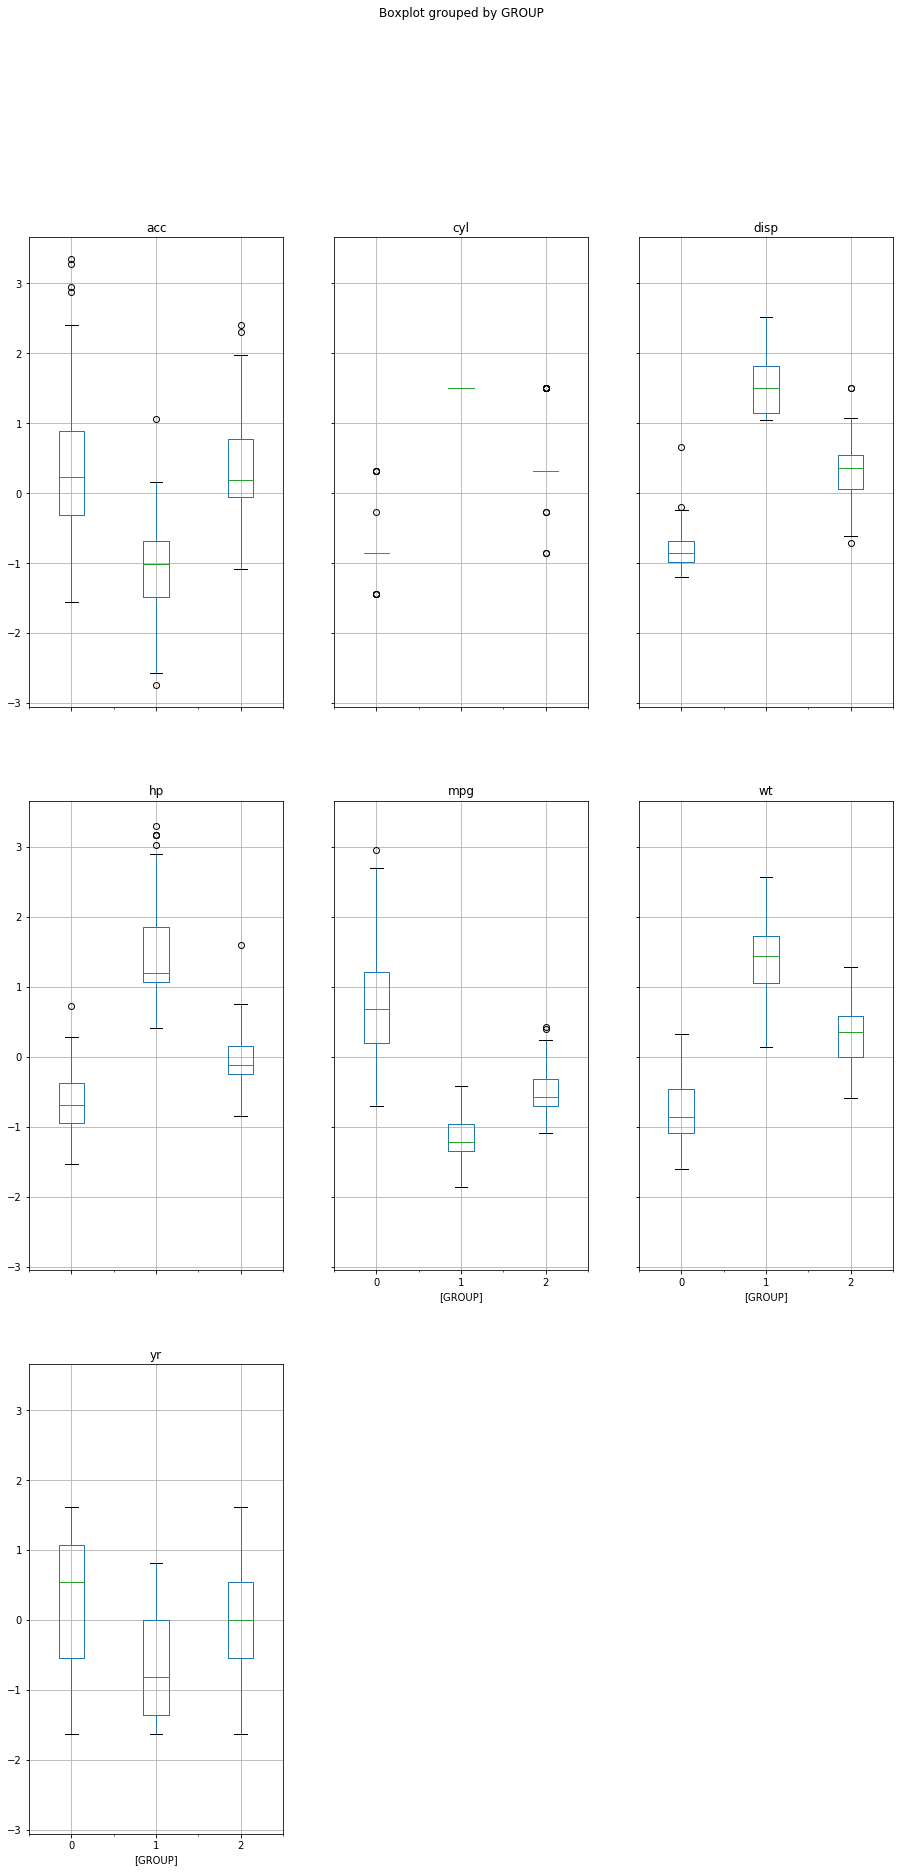

In [53]:
import matplotlib.pylab as plt

df_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [54]:
df_z
#I can see from the data that we have 3 labels attached to the dataset and now is the time for drilling down further 
# and segregating the groups of data as per the labels and as per the problem statement, running the regression 
#analysis on the 3 of them to get the prediction.

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,1
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,1
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,1
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,1
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,1
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,1


In [55]:
#Case1: Filtering the label as 1 and then doing the analysis on that.
df_z_1=df_z[df_z["GROUP"]==0]

In [56]:
df_z_1.shape

(211, 8)

In [57]:
df_z_1.dtypes

cyl      float64
disp     float64
hp       float64
wt       float64
acc      float64
yr       float64
mpg      float64
GROUP      int32
dtype: object

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rachi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


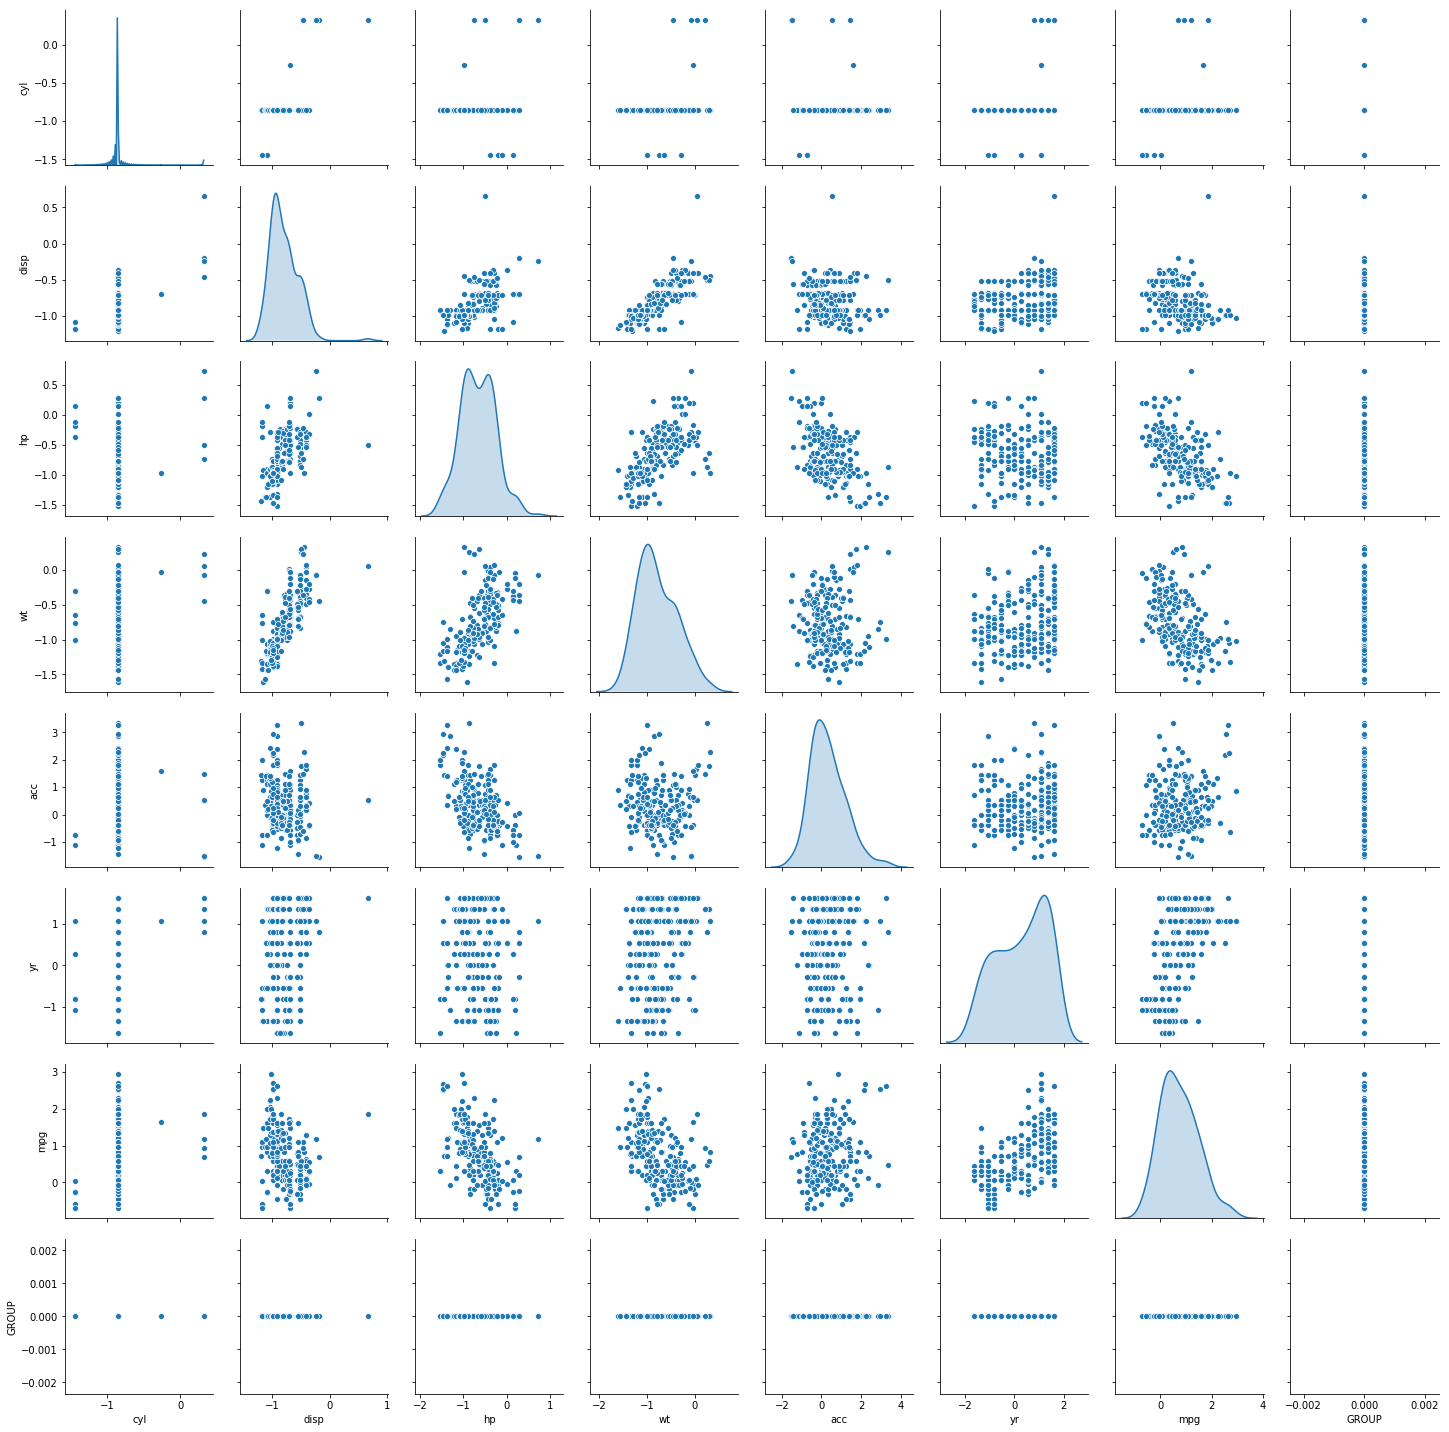

In [58]:
sns.pairplot(df_z_1,diag_kind='kde')

In [59]:
x_ind=df_z_1.drop(labels="mpg",axis=1)

In [61]:
y_dep=df_z_1[["mpg"]]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.30,random_state=1)

In [66]:
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()

In [67]:
#This is the point of creating the best fit line for our model
regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
#Let us explore the coefficients for each of the independent attributes
#There is an array internally that is created, we can access that array by the below code
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.1028426262885394
The coefficient for disp is -0.42884990231774744
The coefficient for hp is -0.1971824822425256
The coefficient for wt is -0.70500768437392
The coefficient for acc is 0.010674515356533892
The coefficient for yr is 0.4327733729561487
The coefficient for GROUP is 0.0


In [70]:
#Which means as the cyl increases, the mpg increases by around 1.1 times of that
#As the disp increases, mpg decreases by 0.42 times
#As the wt increases, the mpg decreases which coincides with the domain knowledge that we have

In [72]:
#Case2: Filtering the label as 1 and then doing the analysis on that.
df_z_2=df_z[df_z["GROUP"]==1]

In [74]:
df_z_2.shape

(95, 8)

In [75]:
df_z_2.dtypes

cyl      float64
disp     float64
hp       float64
wt       float64
acc      float64
yr       float64
mpg      float64
GROUP      int32
dtype: object

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rachi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


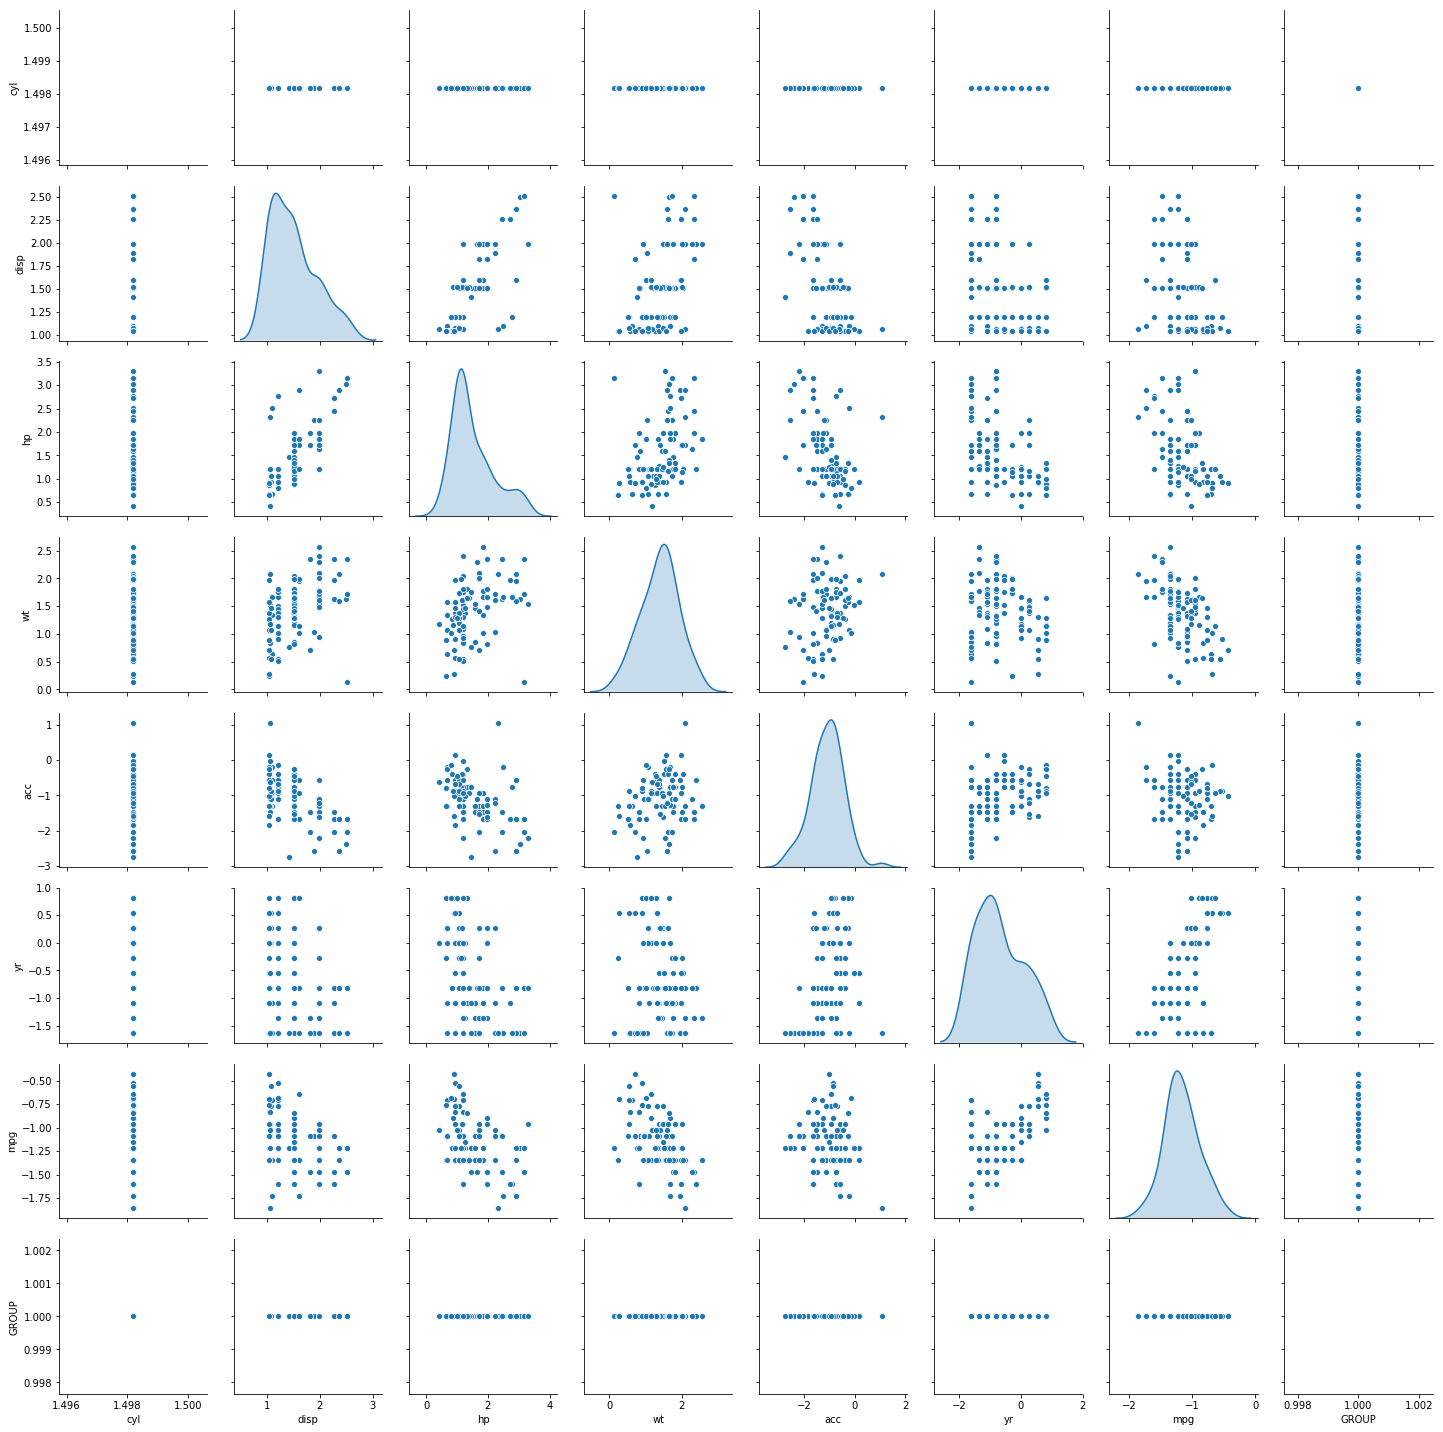

In [77]:
sns.pairplot(df_z_2,diag_kind='kde')

In [78]:
x_ind2=df_z_2.drop(labels="mpg",axis=1)

In [79]:
y_dep2=df_z_2[["mpg"]]

In [80]:
regression_model2=LinearRegression()

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_ind2,y_dep2,test_size=0.30,random_state=1)

In [82]:
regression_model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
#Printing the coefficients for this Group of values
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for cyl is 0.3276018056756721
The coefficient for disp is 0.02758432302475807
The coefficient for hp is -0.15817513612143716
The coefficient for wt is -0.16674110967878053
The coefficient for acc is -0.15287738834565065
The coefficient for yr is 0.16417548808069926
The coefficient for GROUP is 0.0


In [84]:
#For this class of data, we see that by increasing cyl values, mpg increases but not to a very great extent
#The other factors also seem to be negatively correlated but not to a very great extent

In [97]:
#Case3: Filtering the label as 1 and then doing the analysis on that.
df_z_3=df_z[df_z["GROUP"]==2]

In [98]:
df_z_3.shape

(92, 8)

In [99]:
df_z_3.dtypes

cyl      float64
disp     float64
hp       float64
wt       float64
acc      float64
yr       float64
mpg      float64
GROUP      int32
dtype: object

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rachi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


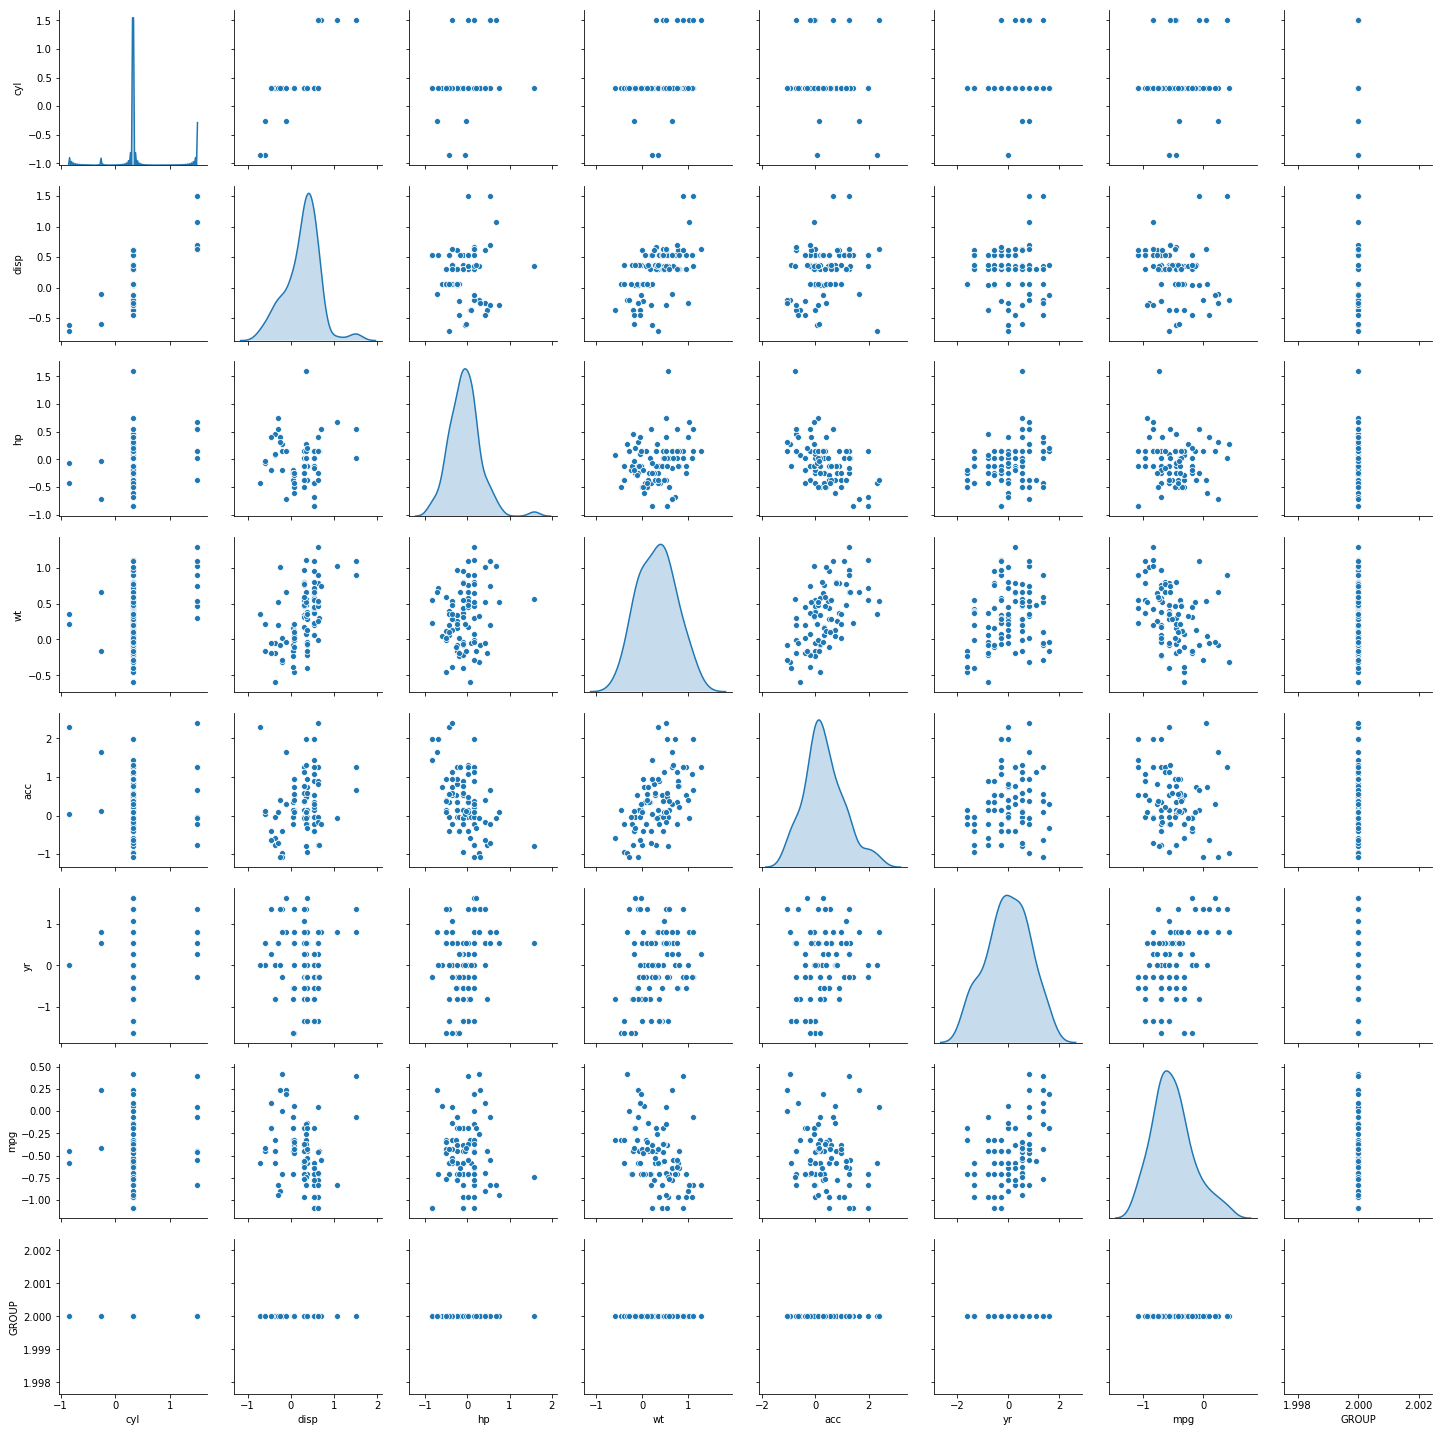

In [100]:
sns.pairplot(df_z_3,diag_kind='kde')

In [101]:
regression_model3=LinearRegression()

In [102]:
x_ind3=df_z_3.drop("mpg",axis=1)
y_dep3=df_z_3[["mpg"]]

In [110]:
x_ind3.shape

(92, 7)

In [111]:
y_dep3.shape

(92, 1)

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x_ind3,y_dep3,test_size=0.30,random_state=1)

In [113]:
regression_model3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
#Printing the coefficients for this Group of values
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[0][idx]))

The coefficient for cyl is 0.10760003032188135
The coefficient for disp is 0.04493995872154897
The coefficient for hp is -0.19678853951339667
The coefficient for wt is -0.3471773476519858
The coefficient for acc is -0.059036070207966806
The coefficient for yr is 0.24005970045046876
The coefficient for GROUP is 0.0


In [115]:
#For this class of cars, the cyl does not seem to have a significant impact on the cars
#Weight is having some negative impact on these class of cars
